---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

**Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.**

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

**The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).** 

**Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.**
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, **return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.**

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

## ROC Curve and Area Under the Curve (AUC) Explained

- Used to visualize the performance of a binary classifier.
- Use logistic regression to develop a prediction and probability of the likelihood of the prediction.
<br><br>
- ROC plots the the FPR on the x-axis and the TPR on the y-axis for every possible classification threshold.
- TPR = True Positives / All Positives answers the question **When the actual classification is positive, how often does the model predict postive?**
- FPR = False Positive / All Negatives answers the question **When the actual classification is negative, how often does the model incorrectly predict positive?**

## Approach:

- What features are most relevant?
- Most likely need to map lattitude and longitude to blight-ticket compliance data.
- How should I explore the data?
- What to do with null compliant values?
- Seems to be a relationship between judgement_amount and compliance
- How does location play a role?

### Notes

**Tranforming String Objects to Quantitative Data**
- Use `LabelEncoder` or `OneHotEncoder` to translate categorical features to numerical values to use with sklearn.
- `LabelEncoder` assigns laber a with a value between 0 and n_classes-1. n is the # of distinct labels.
- When use `LabelEcoder` to transform to numerical value, must inform model that the numerical values are categorical. Do not want the model to assume correlations when not appropriate.
- By using `OneHotEncoder`, I can prevent the model from believing that the new numerical values are hiearchical.
- `OneHotEncoder` takes the econded columnas and divides it into multiple columns assigning 1s and 0s to the columns, depending on the columns' values.


## IMPORTANT CONCLUSION

- Calculate `y_prob`, **not** `y_pred`, by using `predict_proba()`, **not** `predict()`.
- Adjust `y_prob` when calculating FPR and TPR - `roc_curve(y_test, y_prob[:,1])`.
- Use `[:,1]` b/c `predict_proba()` returns a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1.
- FPR and TPR are used to calculate AUC.

In [125]:
!pip install --upgrade pip
!pip install --upgrade sklearn
!pip install imbalanced-learn
!pip install xgboost

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.1.1)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=1c0da495fb3962142313a16d44341948ab0406234395c590ab683bc7d6a8524c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, auc, confusion_matrix, f1_score, classification_report
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
import xgboost as xgb

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, TomekLinks
from imblearn.over_sampling import RandomOverSampler

from scipy import stats

---
# Data Import and Processing


In [8]:
train = pd.read_csv('data/train.csv', engine='python')
test = pd.read_csv('data/test.csv', engine='python')
address = pd.read_csv('data/addresses.csv', engine='python')
lat_lons = pd.read_csv('data/latlons.csv', engine='python')

In [9]:
address.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [10]:
lat_lons.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


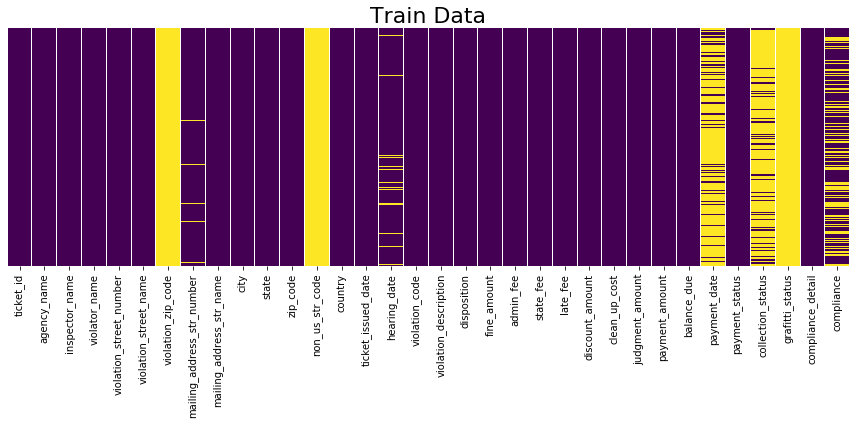

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Train Data', fontsize=22)
plt.tight_layout();

In [12]:
test.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN


In [13]:
test.iloc[:,10:25].head(2)

,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost
0,MI,48213,NaN,USA,2012-01-04 14:00:00,2012-01-19 09:00:00,22-2-61,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0
1,MI,48219,NaN,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0


In [14]:
def plot_null_values(df, title):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title(title, fontsize=22)
    plt.tight_layout();

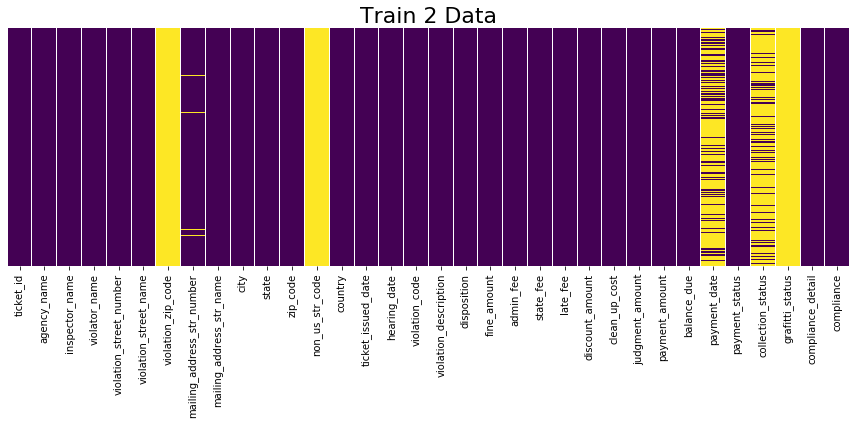

In [15]:
train2 = train[train['compliance'].isnull() == False].copy()
plt.figure(figsize=(12,6))
sns.heatmap(train2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Train 2 Data', fontsize=22)
plt.tight_layout();

In [114]:
prcnt_compliant = round(sum(train2['compliance']) / len(train2['compliance']), 5)
print('Percent of Total Property Owners that are Compliant: ', prcnt_compliant)
print('Percent of Total Property Owners that are Noncompliant: ', 1 - prcnt_compliant)

Percent of Total Property Owners that are Compliant:  0.07254
Percent of Total Property Owners that are Noncompliant:  0.92746


In [64]:
def create_bool_col(x, val):
    if x == val:
        boolean = 1
    else:
        boolean = 0
    return boolean

In [65]:
print('# of Unique Violation Codes: ', len(train2['violation_code'].unique()))
print('# of Unique Agencies: ', len(train2['agency_name'].unique()))
print('# of Unique Dispositions: ', len(train2['disposition'].unique()))

# of Unique Violation Codes:  189
# of Unique Agencies:  5
# of Unique Dispositions:  4


In [66]:
print('Unique Dispositions: ', train2['disposition'].unique())

Unique Dispositions:  ['Responsible by Default' 'Responsible by Determination'
 'Responsible by Admission' 'Responsible (Fine Waived) by Deter']


## Feature Engineering

In [19]:
train2['detroit_address'] = train2['city'].apply(lambda x: create_bool_col(x, 'Detroit'))
train2['MI_address'] = train2['state'].apply(lambda x: create_bool_col(x, 'MI'))
train2['USA_address'] = train2['country'].apply(lambda x: create_bool_col(x, 'USA'))
train2['CAN_address'] = train2['country'].apply(lambda x: create_bool_col(x, 'Cana'))

In [68]:
# Create onehot-encoded features.
violation_code_dummy = pd.get_dummies(train2['violation_code'])
inspector_dummy = pd.get_dummies(train2['inspector_name'])
disposition_dummy = pd.get_dummies(train2['disposition'])
agency_dummy = pd.get_dummies(train2['agency_name'])

### Create New Datasets

In [21]:
train3 = train2[['detroit_address', 'MI_address', 'USA_address', 'CAN_address', 'fine_amount', 
                 'late_fee', 'compliance']].copy()
train3 = pd.concat([train3, violation_code_dummy, inspector_dummy], axis=1)
train3.head(2)

,detroit_address,MI_address,USA_address,CAN_address,fine_amount,late_fee,compliance,19420901,19450901,19830901,...,"Watson, Jerry","Wilcox, Valerie","Wilkins, Rolland W","Williams, Cecila","Williams, Darrin","Williams, Dennis E","Williamson, Lillett","Woodall, Joseph","Zawislak, Norbet","Zizi, Josue"
0,0,0,1,0,250.0,25.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,750.0,75.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
train4 = pd.concat([agency_dummy, disposition_dummy, violation_code_dummy, inspector_dummy], axis=1)

## Baseline Model - Random Forest

In [80]:
X3 = train3.drop('compliance', axis=1).values
y3 = train3['compliance'].values

X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.20, random_state=3)

In [81]:
X3.shape

(159880, 354)

In [84]:
n_features = int(np.sqrt(X3.shape[1]))
base_forest = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
base_forest.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [85]:
forest_train_auc = cross_val_score(base_forest, X3_train, y3_train, scoring='roc_auc', cv=5)
y3_prob = base_forest.predict_proba(X3_val)[:,1]
y3_auc = roc_auc_score(y3_val, y3_prob)

print('Random Forest Baseline AUC Score - Train: ', forest_train_auc)
print('Random Forest - Baseline - AUC Score - Validation: ', y3_auc )

Random Forest Baseline AUC Score - Train:  [0.76531413 0.75862349 0.7598966  0.76292415 0.76830887]
Random Forest - Baseline - AUC Score - Validation:  0.7670486683473338


In [86]:
perm_imp = permutation_importance(base_forest, X3_val, y3_val, scoring='roc_auc', n_repeats=10, random_state=3)



In [90]:
def plot_permutation_import(model, X, y, feat_names, n_repeats=10):
    perm_imp = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=n_repeats, random_state=3)
    #feature_names = pd.Series(train_set.columns.drop('compliance'))
    results = perm_imp.importances_mean
    df_perm_import = pd.DataFrame()
    df_perm_import['feature_names'] = feat_names
    df_perm_import['perm_import_score'] = results
    df_perm_import.columns=df_perm_import.columns.str.strip()
    df_perm_import.sort_values('perm_import_score', inplace=True, ascending=False)
    
    plt.figure(figsize=(12,12))
    perm_import_top_25 = df_perm_import.iloc[:25, :]
    sns.barplot(x='perm_import_score', y='feature_names', data=perm_import_top_25, palette='Pastel2')
    plt.title('Permutation Importance - Validation Set - Random Forest - Baseline', fontsize=22)
    plt.tight_layout()
    plt.show();

In [87]:
feature_names = pd.Series(train3.columns.drop('compliance'))
results = perm_imp.importances_mean
df_perm_import = pd.DataFrame()
df_perm_import['feature_names'] = feature_names
df_perm_import['perm_import_score'] = results
df_perm_import.columns=df_perm_import.columns.str.strip()
df_perm_import.sort_values('perm_import_score', inplace=True, ascending=False)
df_perm_import.head(10)

,feature_names,perm_import_score
5,late_fee,0.160209
185,9-1-81(a),0.016111
4,fine_amount,0.010367
149,9-1-36(a),0.004761
288,"Morris, John",0.002746
29,22-2-45,0.001963
38,22-2-61,0.001293
100,9-1-103(C),0.001272
320,"Sims, Martinzie",0.001202
286,"Moore, David",0.000670


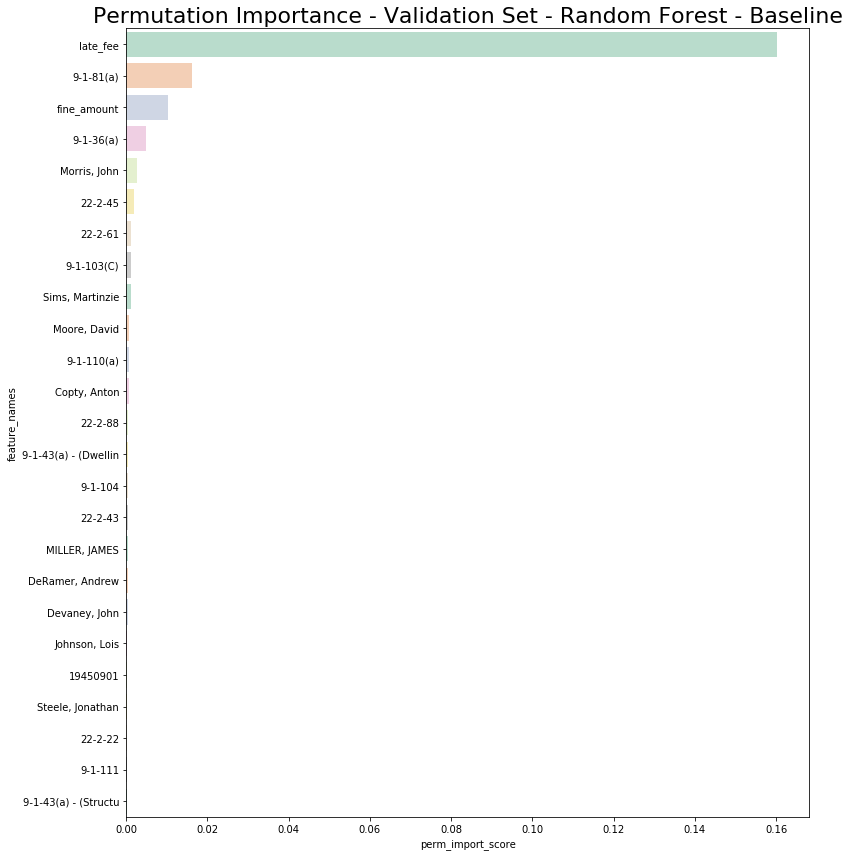

In [96]:
plt.figure(figsize=(12,12))
perm_import_top_25 = df_perm_import.iloc[:25, :]
sns.barplot(x='perm_import_score', y='feature_names', data=perm_import_top_25, palette='Pastel2')
plt.title('Permutation Importance - Validation Set - Random Forest - Baseline', fontsize=22)
plt.tight_layout();

In [57]:
train2[train2['violation_code'] == '9-1-81(a)'].iloc[:, :20].head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount
6133,24858,"Buildings, Safety Engineering & Env Department","Devaney, John","CENTER OF EXCELLENCE, *",3415.0,HANCOCK,NaN,29669.0,PLEASANT TRAIL,SOUTHFIELD,MI,48076,NaN,USA,2005-03-08 12:10:00,2005-04-22 13:30:00,9-1-81(a),Failure to obtain certificate of registration ...,Responsible by Default,250.0
6148,24865,"Buildings, Safety Engineering & Env Department","Devaney, John","WILLIAMS, LENARD",5920.0,LINWOOD,NaN,2655.0,KARR,BELLEVILLE,MI,48111,NaN,USA,2005-03-08 12:40:00,2005-04-22 13:30:00,9-1-81(a),Failure to obtain certificate of registration ...,Responsible by Default,250.0


In [58]:
train2[train2['violation_code'] == '9-1-36(a)'].iloc[:,:20].head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0
5,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,NaN,2755.0,E. 17TH,LOG BEACH,CA,908041512,NaN,USA,2004-05-01 11:50:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0


###  Random Undersampling

In [122]:
rndm_undr_smplr_3 = RandomUnderSampler(random_state=1)
rndm_undr_smplr_3.fit(X3_train, y3_train)
X_3_train_undr, y_3_train_undr = rndm_undr_smplr_3.fit_resample(X_3_train, y_3_train)

AttributeError: 'RandomUnderSampler' object has no attribute '_validate_data'

In [127]:
random_under_sampler = RandomUnderSampler(random_state=3)
X3_train_rndm, y3_train_rndm = random_under_sampler.fit_sample(X3_train, y3_train)
#  = random_under_sampler.fit_sample(X3_train, y3_train)

forest_rndm = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest_rndm.fit(X3_train_rndm, y3_train_rndm)

forest_train_auc = cross_val_score(forest_rndm, X3_train_rndm, y3_train_rndm, scoring='roc_auc', cv=5)
y3_prob = forest_rndm.predict_proba(X3_val)[:,1]
y3_auc = roc_auc_score(y3_val, y3_prob)

print('Random Forest - Random Under - Baseline AUC Score - Train: ', forest_train_auc)
print('Random Forest - Random Under - Baseline - AUC Score - Validation: ', y3_auc )

AttributeError: 'RandomUnderSampler' object has no attribute '_validate_data'

In [ ]:
feature_names = pd.Series(train3.columns.drop('compliance'))
plot_permutation_import(forest_rndm, X3_val, y3_val, feature_names, n_repeats=10)

### Tomek Links Undersampling

In [103]:
X3_train_tom, y3_train_tom = TomekLinks().fit_resample(X3_train, y3_train)

forest_tom = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest_tom.fit(X3_train_tom, y3_train_tom)

forest_tom_train_auc = cross_val_score(forest, X3_train_tom, y3_train_tom, scoring='roc_auc', cv=5)
y3_prob = forest_tom.predict_proba(X3_val)[:,1]
y3_auc_tom = roc_auc_score(y3_val, y3_prob)

print('Random Forest - Tomek Link - Baseline AUC Score - Train: ', forest_tom_train_auc)
print('Random Forest - Tomek Link - Baseline - AUC Score - Validation: ', y3_auc_tom )

AttributeError: 'TomekLinks' object has no attribute '_validate_data'

In [ ]:
plot_permutation_import(forest_tom, X3_val, y3_val, feature_names, n_repeats=10)

---
## Random Forest - Permutation Importance - OneHot Encoded Only



In [70]:
train4 = pd.concat([agency_dummy, disposition_dummy, violation_code_dummy, inspector_dummy], axis=1)
X4 = train4.values
y4 = train2['compliance'].values

X4_train, X4_val, y4_train, y4_val = train_test_split(X4, y4, test_size=0.20, random_state=3)

n_features = int(np.sqrt(X4.shape[1]))
forest4 = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest4.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [71]:
forest_train_auc = cross_val_score(forest4, X4_train, y4_train, scoring='roc_auc', cv=5)
y4_prob = forest4.predict_proba(X4_val)[:,1]
y4_auc = roc_auc_score(y4_val, y4_prob)

print('Random Forest Baseline AUC Score - Train: ', forest_train_auc)
print('Random Forest - Baseline - AUC Score - Validation: ', y4_auc )

Random Forest Baseline AUC Score - Train:  [0.764259   0.76948016 0.76246491 0.76599471 0.76643673]
Random Forest - Baseline - AUC Score - Validation:  0.7669800241067569


In [ ]:
plot_permutation_import(forest4, X4_val, y4_val, train4.columns, n_repeats=10)

## Random Forest - Permutation Importance - OneHot Encoded Only - Include Detroit, Michigan, USA, Canada

In [91]:
train5 = train2[['detroit_address', 'MI_address', 'USA_address', 'CAN_address']].copy()
train5 = pd.concat([train5, agency_dummy, disposition_dummy, violation_code_dummy, inspector_dummy], axis=1)
X5 = train5.values
y5 = train2['compliance'].values

X5_train, X5_val, y5_train, y5_val = train_test_split(X5, y5, test_size=0.20, random_state=3)

n_features = int(np.sqrt(X5.shape[1]))
forest5 = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest5.fit(X5_train, y5_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=19,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [93]:
forest5_train_auc = cross_val_score(forest5, X5_train, y5_train, scoring='roc_auc', cv=5)
y5_prob = forest5.predict_proba(X5_val)[:,1]
y5_auc = roc_auc_score(y5_val, y5_prob)

print('Random Forest Baseline AUC Score - Train: ', forest5_train_auc)
print('Random Forest - Baseline - AUC Score - Validation: ', y5_auc )

Random Forest Baseline AUC Score - Train:  [0.76468968 0.77223395 0.76493149 0.76364651 0.76859819]
Random Forest - Baseline - AUC Score - Validation:  0.768366648063413


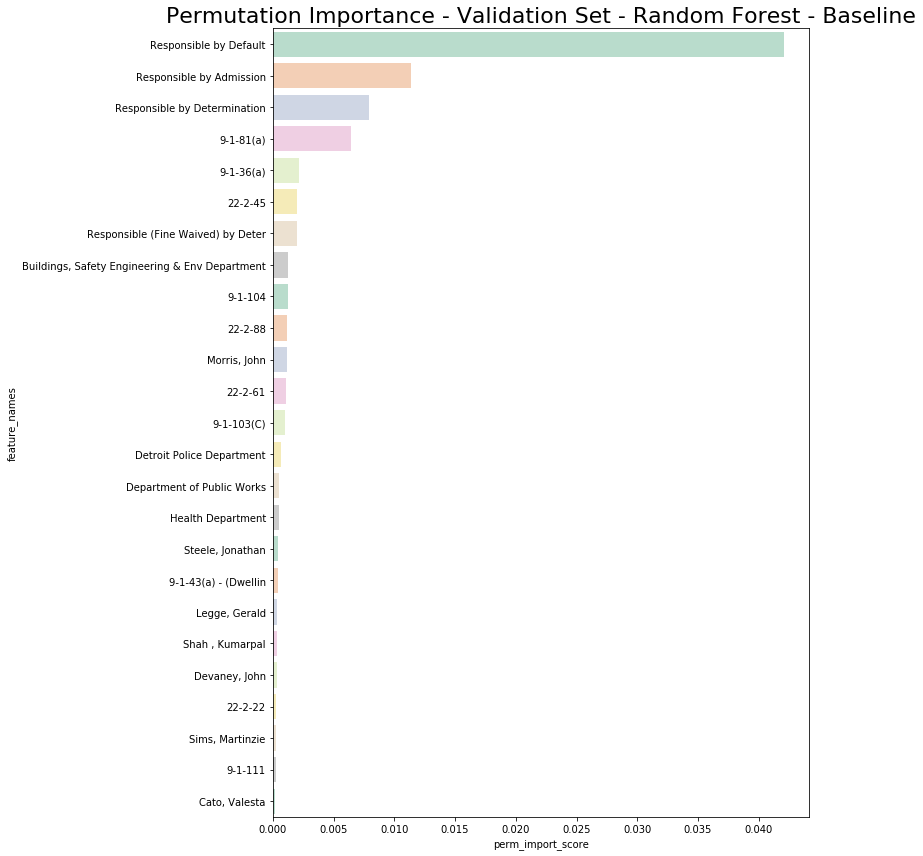

In [94]:
plot_permutation_import(forest5, X5_val, y5_val, train5.columns, n_repeats=10)

## Random Forest - Train Set #6 - Numeric Only - Permutation Importance  

In [118]:
train6 = train2[['fine_amount', 'admin_fee', 'late_fee', 'discount_amount', 'clean_up_cost']].copy()
#train6 = pd.concat([train6, agency_dummy, disposition_dummy, violation_code_dummy, inspector_dummy], axis=1)
X6 = train6.values
y6 = train2['compliance'].values

X6_train, X6_val, y6_train, y6_val = train_test_split(X6, y6, test_size=0.20, random_state=3)

n_features = int(np.sqrt(X6.shape[1]))
forest6 = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest6.fit(X6_train, y6_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [119]:
forest6_train_auc = cross_val_score(forest6, X6_train, y6_train, scoring='roc_auc', cv=5)
y6_prob = forest6.predict_proba(X6_val)[:,1]
y6_auc = roc_auc_score(y6_val, y6_prob)

print('Random Forest Baseline AUC Score - Train: ', forest6_train_auc)
print('Random Forest - Baseline - AUC Score - Validation: ', y6_auc )

Random Forest Baseline AUC Score - Train:  [0.75840445 0.7500576  0.75491247 0.75902699 0.76233215]
Random Forest - Baseline - AUC Score - Validation:  0.7583135508276291


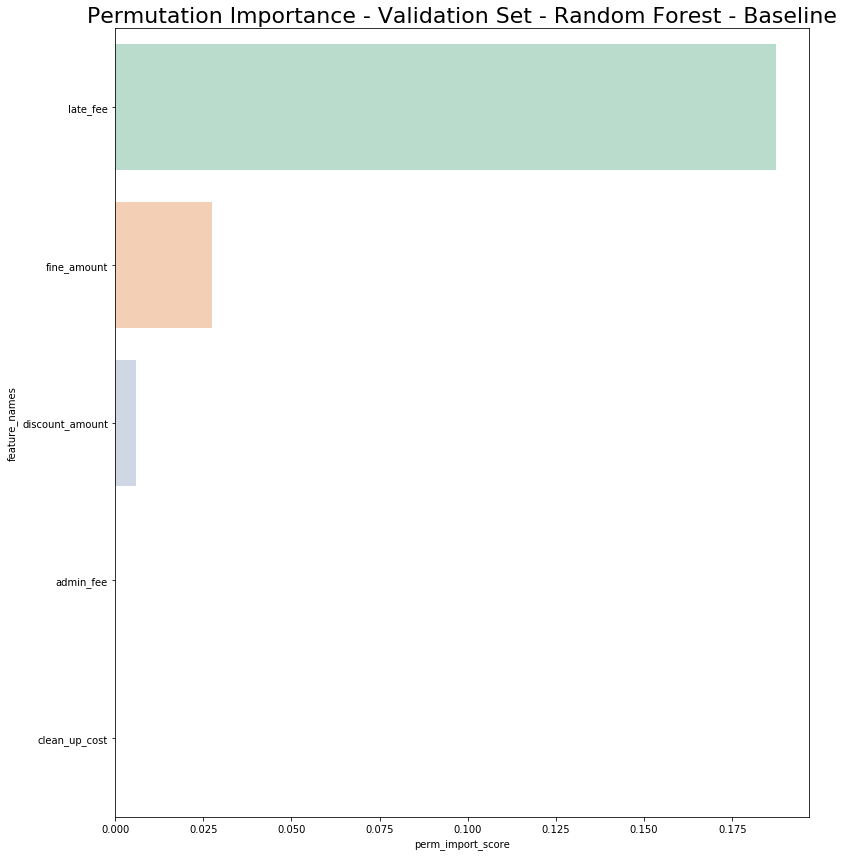

In [120]:
plot_permutation_import(forest6, X6_val, y6_val, train6.columns, n_repeats=10)

## Random Forest - Train Set #7 - Optimized Dataset - Permutation Importance  

In [131]:
train7 = train2[['fine_amount', 'late_fee', 'discount_amount']].copy()
train7 = pd.concat([train7, violation_code_dummy, disposition_dummy, inspector_dummy, agency_dummy], axis=1)
X7 = train7.values
y7 = train2['compliance'].values

X7_train, X7_val, y7_train, y7_val = train_test_split(X7, y7, test_size=0.20, random_state=3)

n_features = int(np.sqrt(X7.shape[1]))
forest7 = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=20, max_features=n_features)
forest7.fit(X7_train, y7_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [132]:
forest7_train_auc = cross_val_score(forest7, X7_train, y7_train, scoring='roc_auc', cv=5)
y7_prob = forest7.predict_proba(X7_val)[:,1]
y7_auc = roc_auc_score(y7_val, y7_prob)

print('Random Forest Baseline AUC Score - Train: ', forest7_train_auc)
print('Random Forest - Baseline - AUC Score - Validation: ', y7_auc )

Random Forest Baseline AUC Score - Train:  [0.78462568 0.79737327 0.78657832 0.79356917 0.79119287]
Random Forest - Baseline - AUC Score - Validation:  0.7893852821099561


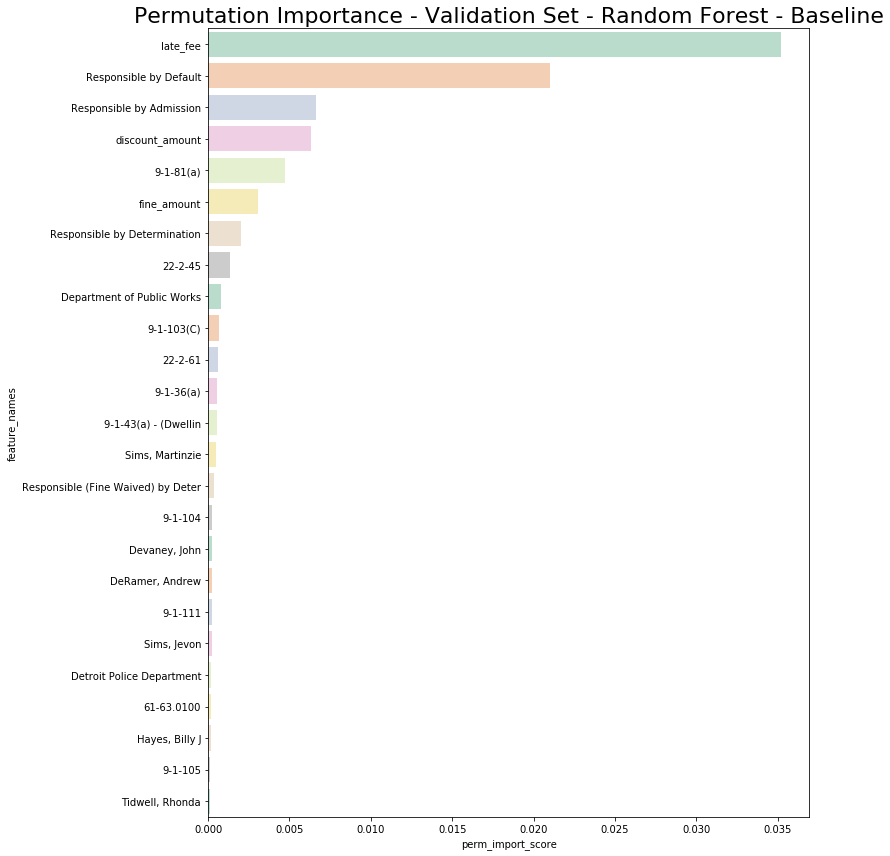

In [133]:
plot_permutation_import(forest7, X7_val, y7_val, train7.columns, n_repeats=10)

---
# Model Selection - Optimize Using RandomizedSearchCV

## Logistic Regression

In [137]:
scaler = MinMaxScaler()
X7_train_scaled = scaler.fit_transform(X7_train)
X7_val_scaled = scaler.transform(X7_val)

In [150]:
log_reg = LogisticRegression(verbose=0)
log_params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['l1','l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [50, 75, 100, 125]
}
                
log_rs_cv = RandomizedSearchCV(log_reg, log_params, random_state=3, cv=5, n_iter=20, n_jobs=-1, scoring='roc_auc')


log_rs_cv.fit(X7_train_scaled, y7_train)
y_pred_log = log_rs_cv.predict(X7_val_scaled)
y_prob_log = log_rs_cv.predict_proba(X7_val_scaled)[:,1]
auc_log = roc_auc_score(y7_val, y_prob_log)


print('Logistic Regression - AUC Score - Validation: ', auc_log)
print('\n')
print(confusion_matrix(y7_val, y_pred_log))
print('\n')
print(classification_report(y7_val, y7_pred_log))

Logistic Regression - AUC Score - Validation:  0.7959941713074282


[[29640    46]
 [ 2009   281]]


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     29686
         1.0       0.86      0.12      0.21      2290

    accuracy                           0.94     31976
   macro avg       0.90      0.56      0.59     31976
weighted avg       0.93      0.94      0.91     31976



In [151]:
print("Best estimator: ")
print(log_rs_cv.best_estimator_.get_params())
print("\n Best score: ")
print(log_rs_cv.best_score_)
print("\n Best parameters:")
print(log_rs_cv.best_params_)

Best estimator: 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

 Best score: 
0.7972485077172564

 Best parameters:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'C': 1.0}


## Random Forest 

In [152]:
rf = RandomForestClassifier(verbose=0)
n_features = int(np.sqrt(X7_train.shape[1]))

rf_params = {
    'max_depth' : ['3', '5'],
    'max_features': np.random.norm(loc=n_features, 3),
    'min_sample_splits' : np.random.uniform(0.01, 0.2),
    'n_estimators' : [10, 25, 50]
}

rf_rs_cv = RandomizedSearchCV(rf, rf_params, random_state=3, cv=5, n_iter=20, n_jobs=-1, scoring='roc_auc')


rf_rs_cv.fit(X7_train, y7_train)
y_pred_rf = rf_rs_cv.predict(X7_val)
y_prob_rf = rf_rs_cv.predict_proba(X7_val)[:,1]
auc_rf = roc_auc_score(y7_val, y_prob_rf)


print('Random Forest - AUC Score - Validation: ', auc_rf)
print('\n')
print(confusion_matrix(y7_val, y_pred_rf))
print('\n')
print(classification_report(y7_val, y7_pred_rf))

SyntaxError: positional argument follows keyword argument (<ipython-input-152-fdc08824cea2>, line 6)

In [ ]:
print("Best estimator: ")
print(rf_rs_cv.best_estimator_.get_params())
print("\n Best score: ")
print(rf_rs_cv.best_score_)
print("\n Best parameters:")
print(rf_rs_cv.best_params_)

## XGBoost

In [ ]:
xgb = XGBoost()

---
# EDA

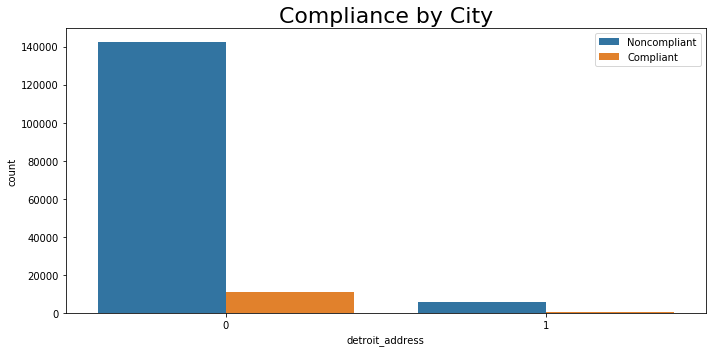

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x='detroit_address', data=train2, hue='compliance')
plt.title('Compliance by City', fontsize=22)
plt.legend(['Noncompliant', 'Compliant'])
plt.tight_layout();

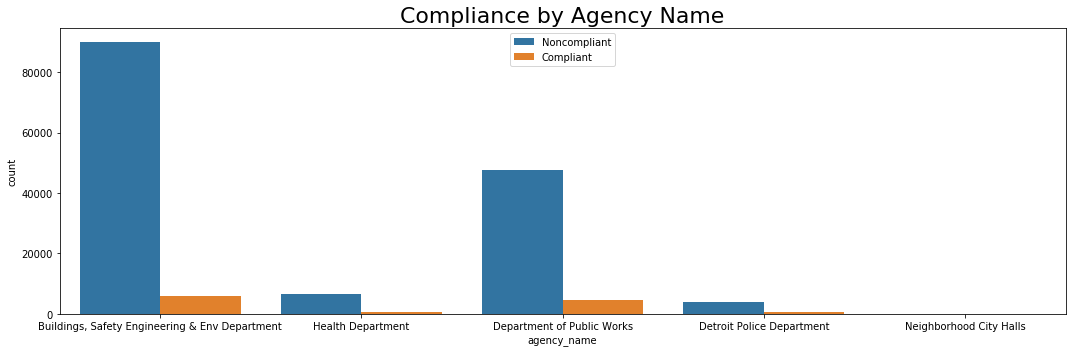

In [115]:
plt.figure(figsize=(15,5))
sns.countplot(x='agency_name', data=train2, hue='compliance', )
plt.title('Compliance by Agency Name', fontsize=22)
plt.legend(['Noncompliant', 'Compliant'])
plt.tight_layout();

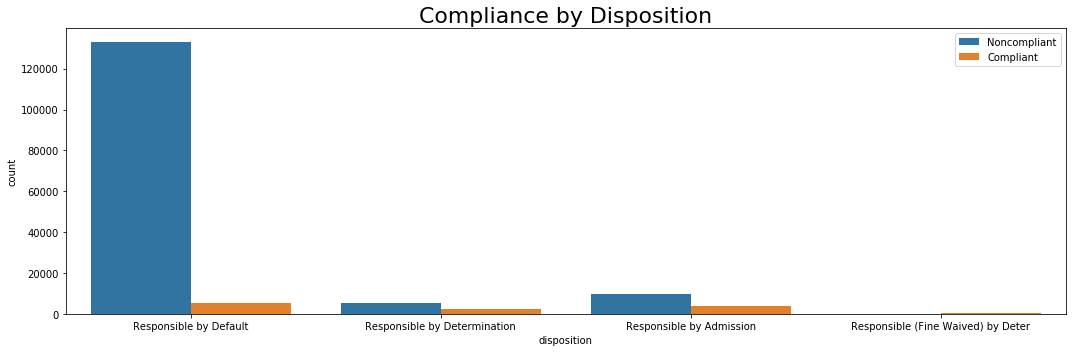

In [116]:
# How can someone be noncompliant if fine was waived?
plt.figure(figsize=(15,5))
sns.countplot(x='disposition', data=train2, hue='compliance')
plt.title('Compliance by Disposition', fontsize=22)
plt.legend(['Noncompliant', 'Compliant'])
plt.tight_layout()